In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from tqdm.contrib.itertools import product

In [2]:
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 8})

np.random.seed(1)
torch.manual_seed(1)

# 1. Define model and related functions

In [3]:
class Ex1(nn.Module):
    def __init__(self, activation, dim: int = 5, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        
        self.activation = activation
        self.layers = nn.Sequential(
            nn.Linear(dim, dim),
            self.activation(),
            nn.Linear(dim, dim),
            self.activation(),
            nn.Linear(dim, dim),
            self.activation(),
        )

    def forward(self, X: torch.Tensor):
        return self.layers(X)
    
def gen_random_weights(dim: int  = 5):
    weights = [
        torch.rand((dim, dim)),
        torch.rand((dim,)),
        torch.rand((dim, dim)),
        torch.rand((dim,)),
        torch.rand((dim, dim)),
        torch.rand((dim,)),
    ]

    return weights

class LinearAct(nn.Module):
    def forward(self, input):
        return input

In [4]:
def set_weight(model: nn.Module, weights: list):
    model.layers[0].weight = nn.Parameter(weights[0])
    model.layers[0].bias = nn.Parameter(weights[1])
    model.layers[1].weight = nn.Parameter(weights[2])
    model.layers[1].bias = nn.Parameter(weights[3])
    model.layers[2].weight = nn.Parameter(weights[4])
    model.layers[2].bias = nn.Parameter(weights[5])

# 2. Define input tensor X

Note: Rather than setting X as 5-dimensional vector and repeating the experiment with changing x[0] from -10 to 10, I use X as matrix with X[:, 0] varies from -10 to 10 and other elements remain unchanged (i.e. X[:, 1] is kept unchanged, X[:, 2] is kept unchanged...)

In [5]:
N = 1000
d = 5

X = torch.rand((1, d)).repeat(N, 1)
X[:, 0] = torch.linspace(-10, 10, N)
X[:5]

tensor([[-10.0000,   0.2793,   0.4031,   0.7347,   0.0293],
        [ -9.9800,   0.2793,   0.4031,   0.7347,   0.0293],
        [ -9.9600,   0.2793,   0.4031,   0.7347,   0.0293],
        [ -9.9399,   0.2793,   0.4031,   0.7347,   0.0293],
        [ -9.9199,   0.2793,   0.4031,   0.7347,   0.0293]])

In [6]:
list_weights = [
    {'name': 'weightset_1', 'weight': gen_random_weights(d)},
    {'name': 'weightset_2', 'weight': gen_random_weights(d)},
    {'name': 'weightset_3', 'weight': gen_random_weights(d)}
]

list_activations = [
    {'name': 'tanh',   'act': nn.Tanh},
    {'name': 'relu',   'act': nn.ReLU},
    {'name': 'linear', 'act': LinearAct}
]

  0%|          | 0/9 [00:00<?, ?it/s]

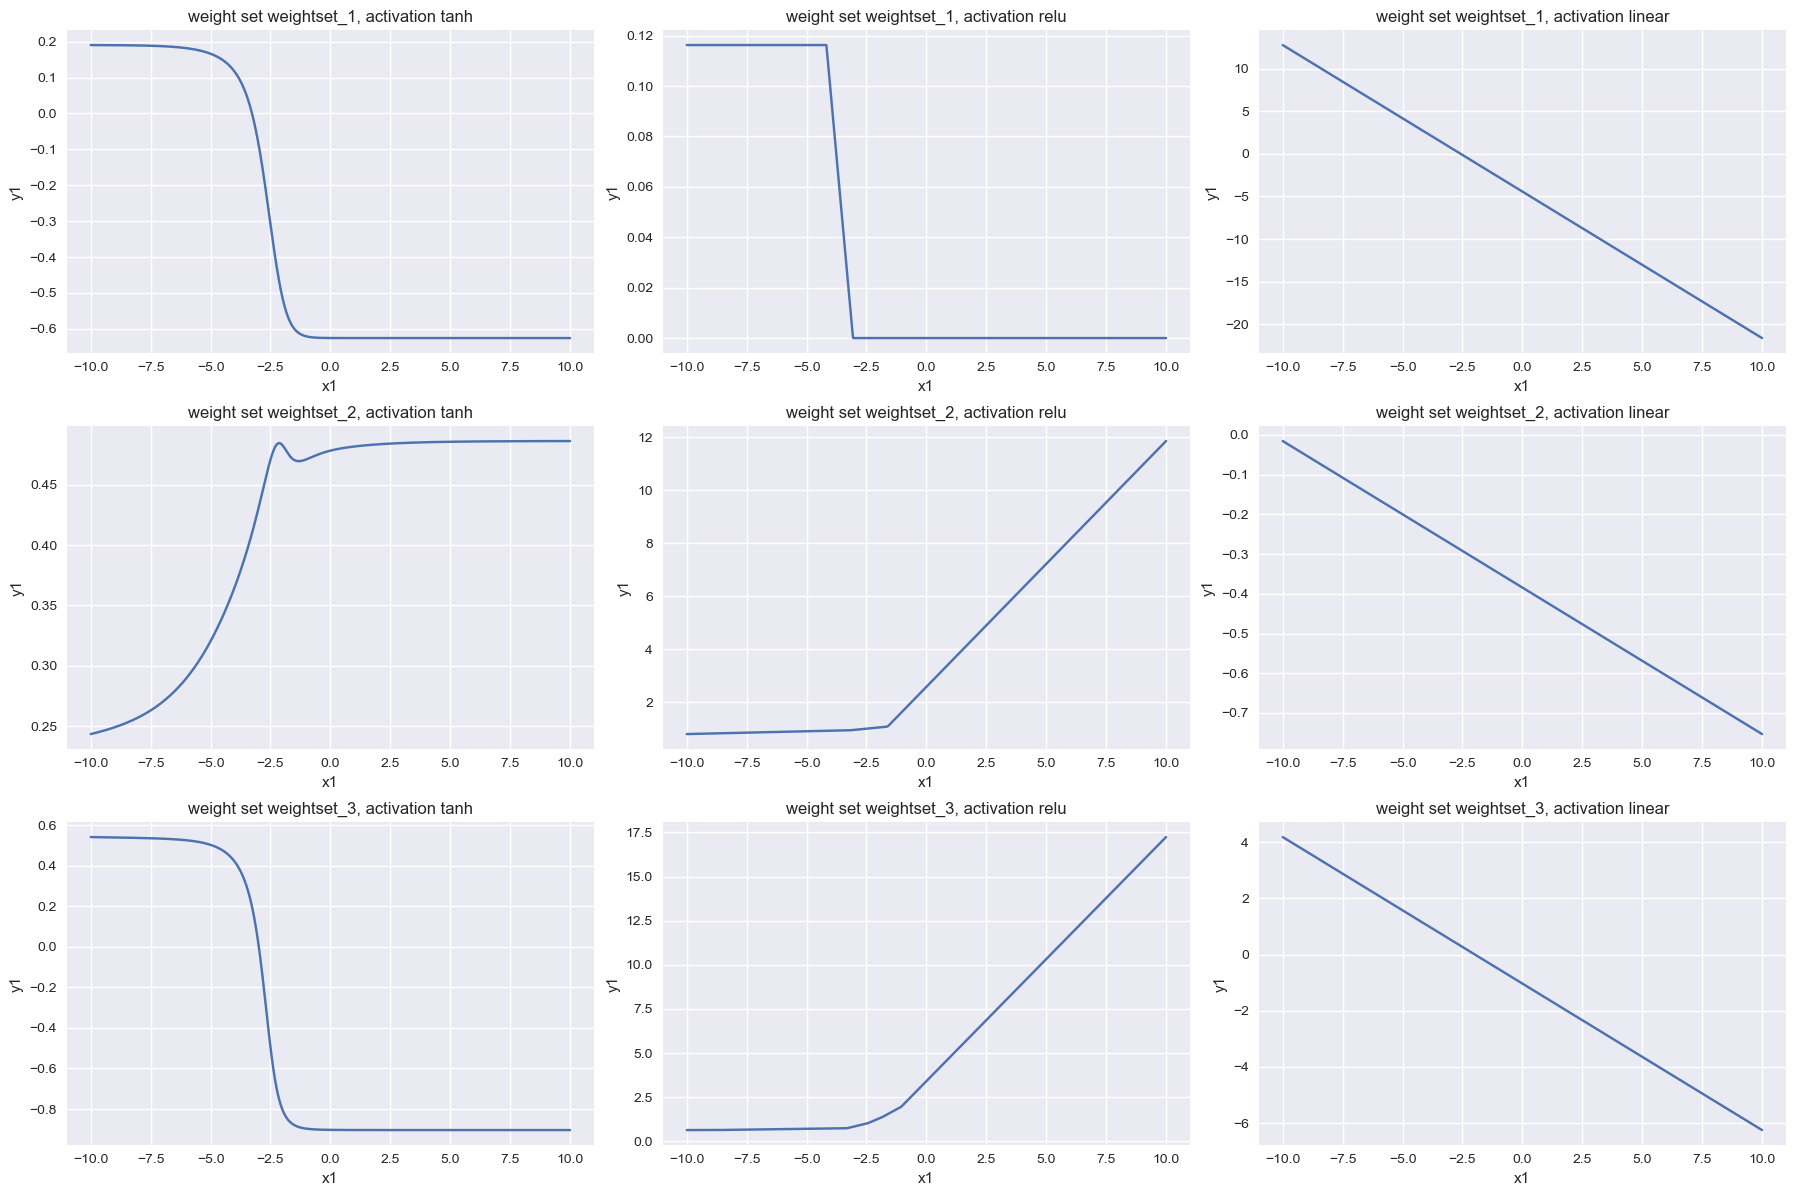

In [7]:
fig = plt.figure(figsize=(18, 12))

for i, (dict_weights, dict_act) in enumerate(product(list_weights, list_activations)):
    name_weight = dict_weights['name']
    weights = dict_weights['weight']
    name_act = dict_act['name']
    act = dict_act['act']

    model = Ex1(act)

    set_weight(model, weights)

    Y = model(X)

    x = X[:, 0]
    y = Y[:, 0].detach().numpy()

    ax = fig.add_subplot(3, 3, i + 1)

    ax.plot(x, y)
    ax.set_xlabel('x1')
    ax.set_ylabel('y1')
    ax.set_title(f'weight set {name_weight}, activation {name_act}')

fig.tight_layout()